### GOAL

Use unsupervised learning to create possible clusters to identify differences bewtween NBA veterans and non-veterans.


### Data
The dataset used is from Kaggle, listing NBA players that have played in the league between 1996-2022 and their season average statistics.  The dataset is relevant to our goal because through a players season statistics, one can interpret the level at which players performs.  This can be directly correlated to the number of years a player is in the NBA, as there skills and reputation increase the longer they are in the league (eventually declining after a certain peak).

### Significance

Being able to group players into categories based on game statistics and the length (and corresponding success of their career) can help identify and decide on many important things in the NBA space.  For example

*   NBA Awards and Hall of Fame acolades
*   Being able to compare salaries between players clustered together
*   Understanding what certain players can provide for a team based on where they are clustered.






In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/capstone_II/all_players - Sheet1.csv')
test= df

test

,player_name,age,player_height,player_weight,draft_year,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,A.C. Green,33,205.74,102.05820,1985,83,7.2,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996-97
1,A.C. Green,34,205.74,102.05820,1985,82,7.3,8.1,1.5,-7.2,0.090,0.196,0.118,0.496,0.074,1997-98
2,A.C. Green,35,205.74,102.05820,1985,50,4.9,4.6,0.5,-5.6,0.097,0.179,0.148,0.441,0.043,1998-99
3,A.C. Green,36,205.74,102.05820,1985,82,5.0,5.9,1.0,8.1,0.089,0.179,0.111,0.482,0.058,1999-00
4,A.C. Green,37,205.74,102.05820,1985,82,4.5,3.8,0.5,3.3,0.089,0.171,0.141,0.492,0.050,2000-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,Zydrunas Ilgauskas,34,220.98,117.93392,1996,65,12.9,7.5,1.0,14.8,0.109,0.212,0.237,0.523,0.060,2008-09
12840,Zydrunas Ilgauskas,35,220.98,117.93392,1996,64,7.4,5.4,0.8,7.9,0.107,0.197,0.189,0.491,0.058,2009-10
12841,Zydrunas Ilgauskas,36,220.98,117.93392,1996,72,5.0,4.0,0.4,9.4,0.119,0.178,0.159,0.531,0.033,2010-11
12842,Zylan Cheatham,24,195.58,99.79024,Undrafted,4,3.0,2.3,0.8,-23.9,0.062,0.128,0.103,0.667,0.094,2019-20


We need have the NBA players dataset. First, we want to change the **player name** column to a numeric vakue/indicator to make the computational work ahead easier for us.

In [ ]:
q=1
for i in range(0,len(df['player_name'])-1):
  if test.loc[i, 'player_name']==test.loc[i+1, 'player_name']:
    test.loc[i,'player_name']= q
  else:
    test.loc[i,'player_name']= q
    q+=1

test.loc[len(df['player_name'])-1,'player_name']= test.loc[len(df['player_name'])-2,'player_name']

test

,player_name,age,player_height,player_weight,draft_year,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,1,33,205.74,102.05820,1985,83,7.2,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996-97
1,1,34,205.74,102.05820,1985,82,7.3,8.1,1.5,-7.2,0.090,0.196,0.118,0.496,0.074,1997-98
2,1,35,205.74,102.05820,1985,50,4.9,4.6,0.5,-5.6,0.097,0.179,0.148,0.441,0.043,1998-99
3,1,36,205.74,102.05820,1985,82,5.0,5.9,1.0,8.1,0.089,0.179,0.111,0.482,0.058,1999-00
4,1,37,205.74,102.05820,1985,82,4.5,3.8,0.5,3.3,0.089,0.171,0.141,0.492,0.050,2000-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,2550,34,220.98,117.93392,1996,65,12.9,7.5,1.0,14.8,0.109,0.212,0.237,0.523,0.060,2008-09
12840,2550,35,220.98,117.93392,1996,64,7.4,5.4,0.8,7.9,0.107,0.197,0.189,0.491,0.058,2009-10
12841,2550,36,220.98,117.93392,1996,72,5.0,4.0,0.4,9.4,0.119,0.178,0.159,0.531,0.033,2010-11
12842,2551,24,195.58,99.79024,Undrafted,4,3.0,2.3,0.8,-23.9,0.062,0.128,0.103,0.667,0.094,2019-20


We see that the dataframe contains the word **"Undrafted"** in either (or both) the **draft_year** and **draft_number** columns.  

To make the data uniform and easier for us to use later in the project, we use the following code to change the **draft_number** entry for Undrafted players as 1000.

In [ ]:
test[test['draft_year']== "Undrafted"]

,player_name,age,player_height,player_weight,draft_year,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
9,4,22,198.12,81.192968,Undrafted,15,3.7,1.4,0.1,-20.1,0.046,0.152,0.189,0.589,0.032,2022-23
10,5,23,195.58,86.182480,Undrafted,35,4.4,1.3,0.6,-4.9,0.016,0.105,0.159,0.607,0.092,2022-23
45,12,21,198.12,95.254320,Undrafted,21,0.9,0.7,0.1,2.2,0.047,0.133,0.138,0.371,0.033,2015-16
46,12,22,198.12,95.254320,Undrafted,5,0.2,0.6,0.6,-18.6,0.000,0.200,0.142,0.102,0.375,2016-17
47,12,23,198.12,95.254320,Undrafted,9,6.7,2.7,1.2,-14.1,0.015,0.091,0.147,0.392,0.072,2017-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12814,2543,30,210.82,115.212368,Undrafted,16,3.2,2.6,0.4,-8.1,0.136,0.200,0.190,0.480,0.063,2004-05
12815,2543,31,210.82,115.212368,Undrafted,12,2.2,0.9,0.0,-20.2,0.075,0.267,0.283,0.593,0.000,2005-06
12825,2548,26,195.58,90.718400,Undrafted,16,1.8,0.5,0.3,-15.3,0.072,0.045,0.217,0.435,0.116,2014-15
12842,2551,24,195.58,99.790240,Undrafted,4,3.0,2.3,0.8,-23.9,0.062,0.128,0.103,0.667,0.094,2019-20


In [ ]:
length = len(test)
for i in range(length):
  if test.loc[i,'draft_year'] == "Undrafted":
    test.loc[i,'draft_year'] = 1000
test

,player_name,age,player_height,player_weight,draft_year,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,1,33,205.74,102.05820,1985,83,7.2,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996-97
1,1,34,205.74,102.05820,1985,82,7.3,8.1,1.5,-7.2,0.090,0.196,0.118,0.496,0.074,1997-98
2,1,35,205.74,102.05820,1985,50,4.9,4.6,0.5,-5.6,0.097,0.179,0.148,0.441,0.043,1998-99
3,1,36,205.74,102.05820,1985,82,5.0,5.9,1.0,8.1,0.089,0.179,0.111,0.482,0.058,1999-00
4,1,37,205.74,102.05820,1985,82,4.5,3.8,0.5,3.3,0.089,0.171,0.141,0.492,0.050,2000-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,2550,34,220.98,117.93392,1996,65,12.9,7.5,1.0,14.8,0.109,0.212,0.237,0.523,0.060,2008-09
12840,2550,35,220.98,117.93392,1996,64,7.4,5.4,0.8,7.9,0.107,0.197,0.189,0.491,0.058,2009-10
12841,2550,36,220.98,117.93392,1996,72,5.0,4.0,0.4,9.4,0.119,0.178,0.159,0.531,0.033,2010-11
12842,2551,24,195.58,99.79024,1000,4,3.0,2.3,0.8,-23.9,0.062,0.128,0.103,0.667,0.094,2019-20


We are going to consider any players that were Undrafted as outliers in the dataset.  There are a couple reasons for this:

*  From the dataset, we can not decide when the player had his first year in the league, and thus can not accurately calculate the number of years of played in the NBA
*   It is common for Undrafted players maybe have years where they leave the NBA and sometimes come back, and since we do not have a way to specifiy this, the model may not take that information in correctly





In [ ]:
df=test[test['draft_year']!= 1000]
df

,player_name,age,player_height,player_weight,draft_year,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,1,33,205.74,102.05820,1985,83,7.2,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996-97
1,1,34,205.74,102.05820,1985,82,7.3,8.1,1.5,-7.2,0.090,0.196,0.118,0.496,0.074,1997-98
2,1,35,205.74,102.05820,1985,50,4.9,4.6,0.5,-5.6,0.097,0.179,0.148,0.441,0.043,1998-99
3,1,36,205.74,102.05820,1985,82,5.0,5.9,1.0,8.1,0.089,0.179,0.111,0.482,0.058,1999-00
4,1,37,205.74,102.05820,1985,82,4.5,3.8,0.5,3.3,0.089,0.171,0.141,0.492,0.050,2000-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12837,2550,32,220.98,117.93392,1996,78,11.9,7.7,1.6,4.6,0.128,0.204,0.218,0.527,0.099,2006-07
12838,2550,33,220.98,117.93392,1996,73,14.1,9.3,1.4,0.7,0.132,0.217,0.229,0.522,0.082,2007-08
12839,2550,34,220.98,117.93392,1996,65,12.9,7.5,1.0,14.8,0.109,0.212,0.237,0.523,0.060,2008-09
12840,2550,35,220.98,117.93392,1996,64,7.4,5.4,0.8,7.9,0.107,0.197,0.189,0.491,0.058,2009-10


We are going to change the **draft_year** column into integers and drop the **season** column we do not need for the model.  Then we will have all numeric features.


In [ ]:
df['draft_year'] = pd.to_numeric(df['draft_year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10486 entries, 0 to 12841
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player_name    10486 non-null  object 
 1   age            10486 non-null  int64  
 2   player_height  10486 non-null  float64
 3   player_weight  10486 non-null  float64
 4   draft_year     10486 non-null  int64  
 5   gp             10486 non-null  int64  
 6   pts            10486 non-null  float64
 7   reb            10486 non-null  float64
 8   ast            10486 non-null  float64
 9   net_rating     10486 non-null  float64
 10  oreb_pct       10486 non-null  float64
 11  dreb_pct       10486 non-null  float64
 12  usg_pct        10486 non-null  float64
 13  ts_pct         10486 non-null  float64
 14  ast_pct        10486 non-null  float64
 15  season         10486 non-null  object 
dtypes: float64(11), int64(3), object(2)
memory usage: 1.6+ MB


<ipython-input-6-aa73de576145>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['draft_year'] = pd.to_numeric(df['draft_year'])


We are also going to disregard any players drafted before 1996, as the full scope of their careers are not shown in the dataset.

In [ ]:
df=df[df['draft_year']>= 1996]

In [ ]:
df= df.drop(columns=['season'])
df['player_name'] = pd.to_numeric(df['player_name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8547 entries, 5 to 12841
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player_name    8547 non-null   int64  
 1   age            8547 non-null   int64  
 2   player_height  8547 non-null   float64
 3   player_weight  8547 non-null   float64
 4   draft_year     8547 non-null   int64  
 5   gp             8547 non-null   int64  
 6   pts            8547 non-null   float64
 7   reb            8547 non-null   float64
 8   ast            8547 non-null   float64
 9   net_rating     8547 non-null   float64
 10  oreb_pct       8547 non-null   float64
 11  dreb_pct       8547 non-null   float64
 12  usg_pct        8547 non-null   float64
 13  ts_pct         8547 non-null   float64
 14  ast_pct        8547 non-null   float64
dtypes: float64(11), int64(4)
memory usage: 1.0 MB


In [ ]:
try_array=test.to_numpy()
len(try_array)

12844

Here we will identify how may years a particular player played in the NBA


In [ ]:
yrs_array = df.groupby(['player_name']).age.count()
yrs_played = pd.DataFrame(yrs_array)
yrs_played.columns = ['yrs_played']
yrs_played

df = pd.merge(df, yrs_played, on='player_name')
df.rename(columns={"age_x":"x","age_y":"yrs_played"})
df

,player_name,age,player_height,player_weight,draft_year,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,yrs_played
0,2,23,208.28,102.965384,1999,8,1.0,2.8,0.0,-32.6,0.158,0.208,0.146,0.190,0.000,1
1,3,23,185.42,81.646560,2000,33,6.0,1.1,1.9,-12.4,0.018,0.053,0.169,0.495,0.198,3
2,3,24,185.42,81.646560,2000,45,5.4,1.0,1.8,-3.8,0.022,0.067,0.221,0.477,0.248,3
3,3,25,185.42,81.646560,2000,2,0.0,0.0,1.0,-3.9,0.000,0.000,0.282,0.000,0.400,3
4,6,19,198.12,99.790240,2022,72,8.9,2.1,1.0,1.5,0.026,0.080,0.174,0.577,0.070,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8542,2550,32,220.98,117.933920,1996,78,11.9,7.7,1.6,4.6,0.128,0.204,0.218,0.527,0.099,13
8543,2550,33,220.98,117.933920,1996,73,14.1,9.3,1.4,0.7,0.132,0.217,0.229,0.522,0.082,13
8544,2550,34,220.98,117.933920,1996,65,12.9,7.5,1.0,14.8,0.109,0.212,0.237,0.523,0.060,13
8545,2550,35,220.98,117.933920,1996,64,7.4,5.4,0.8,7.9,0.107,0.197,0.189,0.491,0.058,13


Now we take the average career statistics for each player and this will be what our model looks at to make clusters.

In [ ]:
df_learn=df.groupby(['player_name']).mean()
df_learn

,age,player_height,player_weight,draft_year,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,yrs_played
player_name,,,,,,,,,,,,,,,
2,23.000000,208.280000,102.965384,1999.0,8.000000,1.000000,2.800000,0.000000,-32.600000,0.158000,0.208000,0.146000,0.190000,0.000000,1.0
3,24.000000,185.420000,81.646560,2000.0,26.666667,3.800000,0.700000,1.566667,-6.700000,0.013333,0.040000,0.224000,0.324000,0.282000,3.0
6,19.000000,198.120000,99.790240,2022.0,72.000000,8.900000,2.100000,1.000000,1.500000,0.026000,0.080000,0.174000,0.577000,0.070000,1.0
7,24.000000,213.360000,117.933920,2016.0,22.000000,2.200000,1.600000,0.200000,-0.600000,0.049000,0.199000,0.167000,0.472000,0.038000,1.0
8,25.500000,187.960000,84.821704,2009.0,43.500000,5.350000,1.333333,2.000000,-2.233333,0.017667,0.090833,0.210667,0.476500,0.248833,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,22.500000,215.900000,95.254320,2016.0,9.500000,1.600000,0.600000,0.050000,-46.400000,0.021000,0.058000,0.248000,0.647500,0.014000,2.0
2546,20.500000,205.740000,83.914520,2021.0,49.500000,6.900000,2.100000,0.950000,-0.500000,0.022500,0.088000,0.161000,0.535000,0.074000,2.0
2547,20.333333,198.966667,128.820128,2019.0,38.000000,25.166667,6.833333,3.466667,5.000000,0.077667,0.131000,0.288667,0.639000,0.179333,3.0


In [ ]:
corr = df_learn.corr()

Text(0.5, 1.0, 'correlation matrix ')

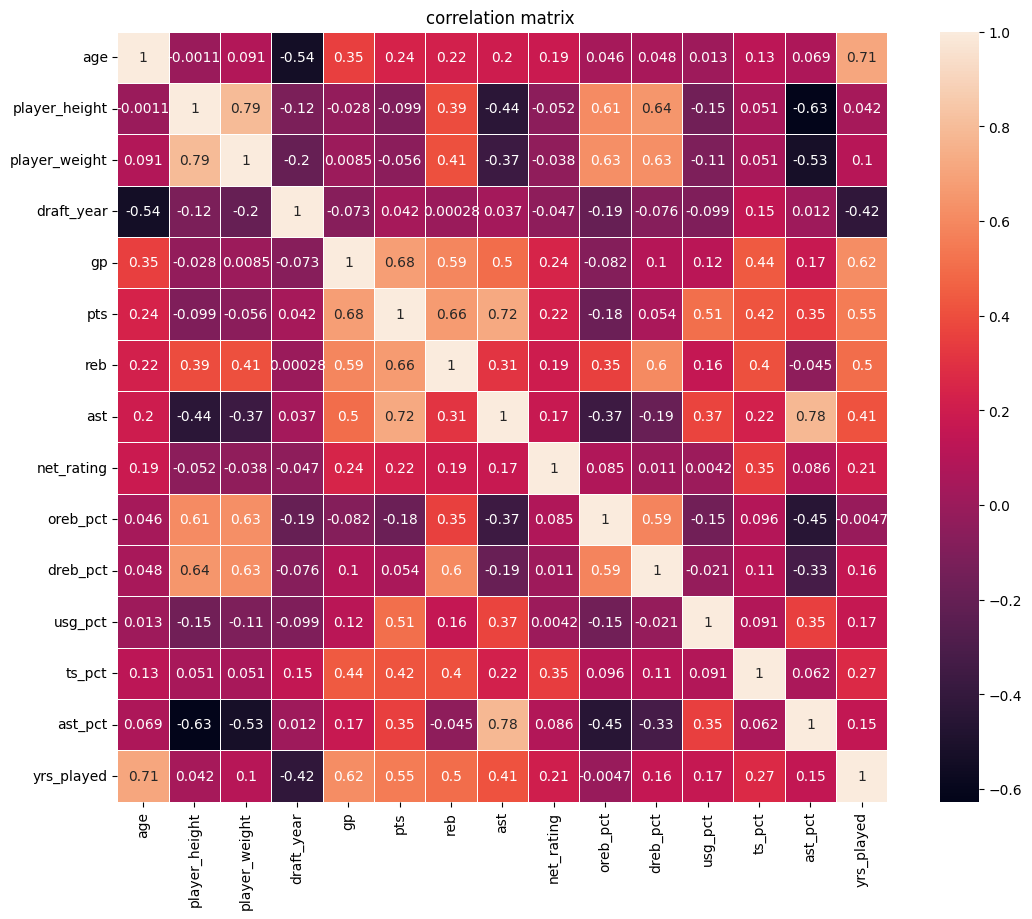

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,10))

plt.subplot(1,2,1)
# Draw the heat map using seaborn
sns.heatmap(corr, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix ")

At quick glance, we can see that all of the correlations between yrs_played and all other features are postive , with the 2 biggest being 0.62 with games played and 0.55 with points.  These 2 are both intuitvely have the biggest correlation with the amount of years played because of the status a veteran player holds, along with their developed skill.

The average career length in the NBA is 4.8 years.  We will identify and NBA veteran as any player with a career 5 years or longer.


In [ ]:
vet_array = []
for i in range(0,len(df_learn['yrs_played'])):
  if df_learn['yrs_played'].iloc[i]<5:
    vet_array.append('0')
  else:
    vet_array.append('1')
vet_array


['0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1'

In [ ]:
df_learn['vet_stat'] = vet_array
df_learn

,age,player_height,player_weight,draft_year,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,yrs_played,vet_stat
player_name,,,,,,,,,,,,,,,,
2,23.000000,208.280000,102.965384,1999.0,8.000000,1.000000,2.800000,0.000000,-32.600000,0.158000,0.208000,0.146000,0.190000,0.000000,1.0,0
3,24.000000,185.420000,81.646560,2000.0,26.666667,3.800000,0.700000,1.566667,-6.700000,0.013333,0.040000,0.224000,0.324000,0.282000,3.0,0
6,19.000000,198.120000,99.790240,2022.0,72.000000,8.900000,2.100000,1.000000,1.500000,0.026000,0.080000,0.174000,0.577000,0.070000,1.0,0
7,24.000000,213.360000,117.933920,2016.0,22.000000,2.200000,1.600000,0.200000,-0.600000,0.049000,0.199000,0.167000,0.472000,0.038000,1.0,0
8,25.500000,187.960000,84.821704,2009.0,43.500000,5.350000,1.333333,2.000000,-2.233333,0.017667,0.090833,0.210667,0.476500,0.248833,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,22.500000,215.900000,95.254320,2016.0,9.500000,1.600000,0.600000,0.050000,-46.400000,0.021000,0.058000,0.248000,0.647500,0.014000,2.0,0
2546,20.500000,205.740000,83.914520,2021.0,49.500000,6.900000,2.100000,0.950000,-0.500000,0.022500,0.088000,0.161000,0.535000,0.074000,2.0,0
2547,20.333333,198.966667,128.820128,2019.0,38.000000,25.166667,6.833333,3.466667,5.000000,0.077667,0.131000,0.288667,0.639000,0.179333,3.0,0


In [ ]:
!pip install umap-learn

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import datasets
import umap

First we standardize our data.


In [ ]:
X = df_learn
y= vet_array
scaler = StandardScaler()
X_std = scaler.fit_transform(X)



Next we are going to try the DBSCAN algorithim.


In [ ]:
dbscan_cluster = DBSCAN(eps=1, min_samples=5)


clusters = dbscan_cluster.fit_predict(X_std)

And for dimensionalty reduction we use UMAP.

In [ ]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

umap_results[0,0]

0.08067151

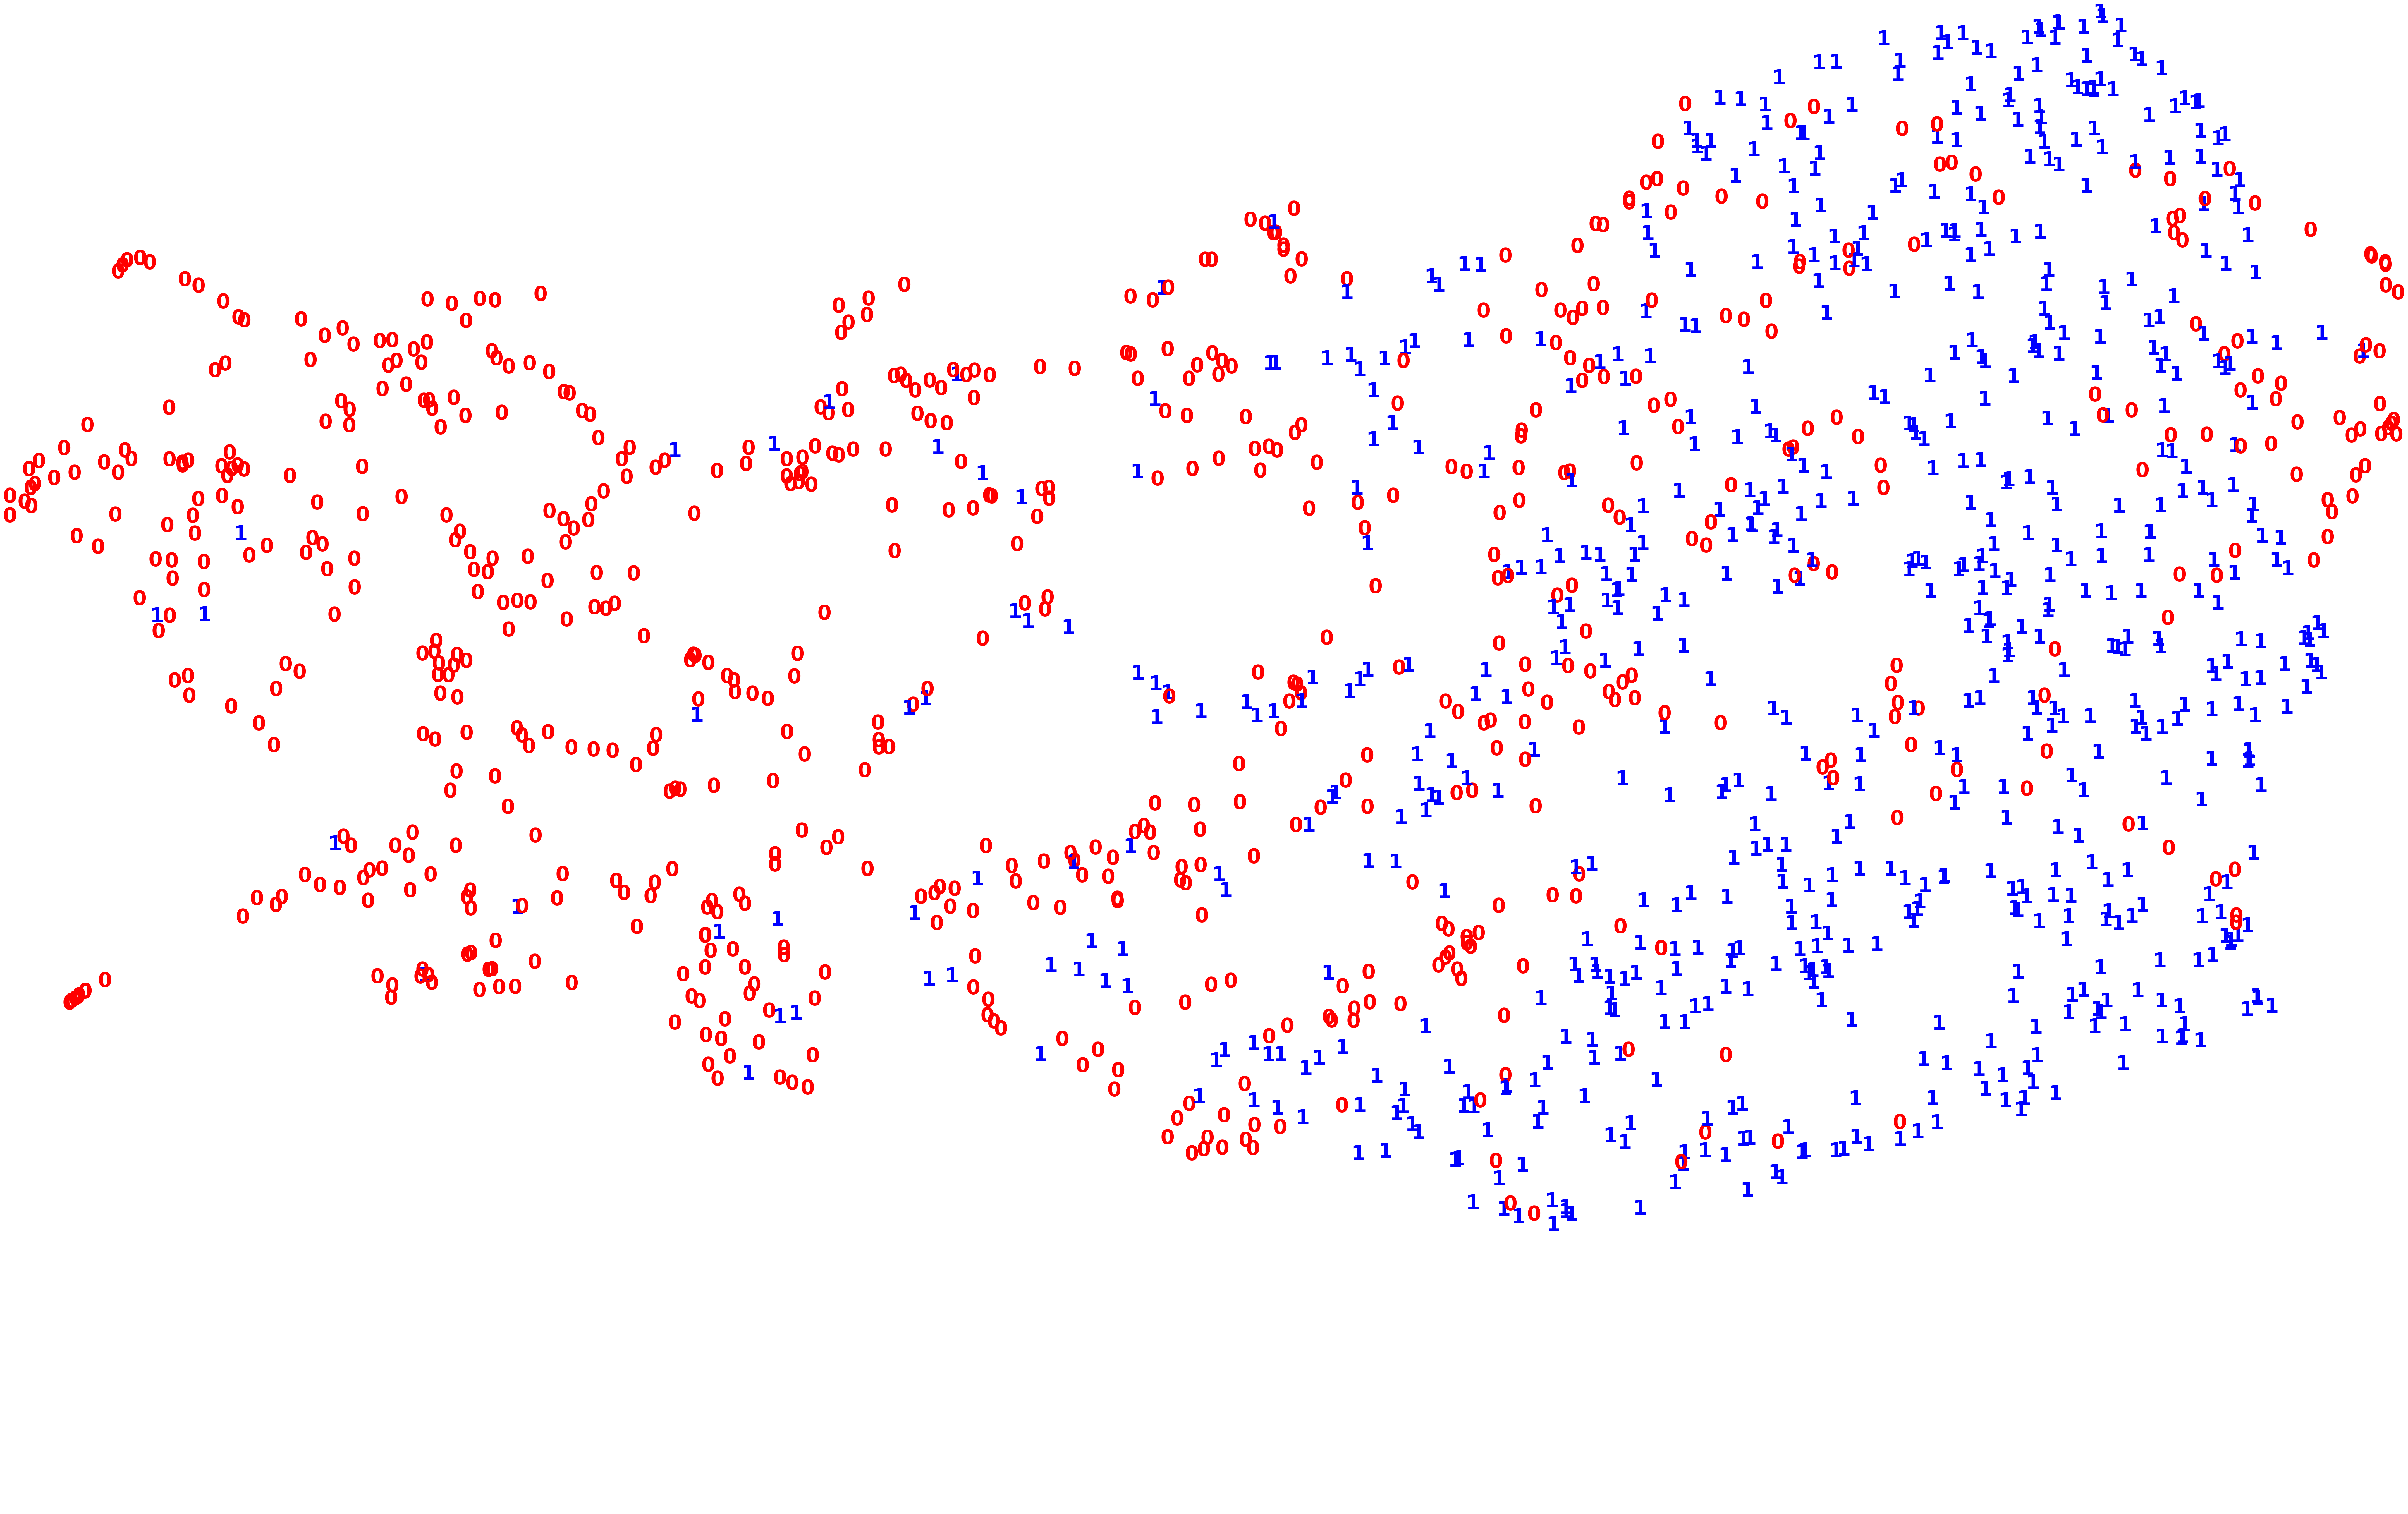

In [ ]:
colours = colours = ['red', 'blue']
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')

plt.show()

DBSCAN shows more of a seperation between the clusters and veteran/non-veteran distinction.  The DBSCAN seems to work better for the dataset as the K-means algorithim uses centriods, which might seem counterintuitive because of the variance between different types of players and situations.  You can also identify outliers that are within the opposite cluster, which makes sense as there are players that do not fit the mold of the veteran and non verteran status.



UMAP displays the seperation and clusters better than the T-SNE, as it displays the clusters through the noise better. The seperation between clusters is not as clear as when we used UMAP.   So our desired model consists of DBSCAN algorithim with UMAP for dimesionality reduction.




In [ ]:
y_pred = []
for i in range(0,len(df_learn['yrs_played'])):
  if df_learn['yrs_played'].iloc[i]<5:
    y_pred.append('red')
  else:
    y_pred.append('blue')
y_pred

['red',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'bl

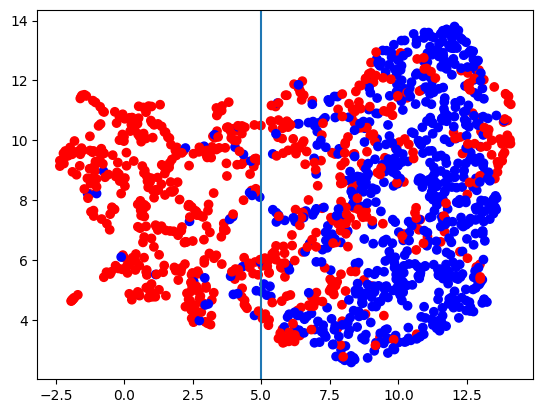

In [ ]:
plt.scatter(umap_results[:,0], umap_results[:,1], c=y_pred)
plt.axvline(x=5)

We can estimate most of the veteran NBA players lay above the horizontal line x=0.  We can extract the following key insights:



*   There is a significant amount of non-veteran players that share similar statistics to veteran players (this may be in part due to the scope of the data , which is from 1996-2022)
*   Outliers for both groups may be due to the scope of the data.




This data can be used to identify notable players due to not only box score statistics but also career length.  

In [ ]:
array_above=[]
array_below=[]
for i in range(umap_results.shape[0]):
    if umap_results[i, 0]>5:
      array_above.append(i)
    else:
      array_below.append(i)
array_above

[2,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 18,
 19,
 20,
 21,
 22,
 24,
 26,
 28,
 30,
 32,
 33,
 34,
 36,
 37,
 39,
 42,
 44,
 46,
 47,
 49,
 50,
 52,
 53,
 54,
 55,
 57,
 58,
 59,
 61,
 62,
 63,
 64,
 65,
 67,
 69,
 70,
 71,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 84,
 86,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 99,
 100,
 101,
 102,
 103,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 121,
 122,
 124,
 125,
 126,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 143,
 144,
 146,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 157,
 158,
 159,
 161,
 162,
 163,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 175,
 180,
 181,
 184,
 185,
 187,
 190,
 191,
 193,
 194,
 196,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 208,
 210,
 211,
 212,
 213,
 214,
 216,
 217,
 219,
 220,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 234,
 236,
 237,
 238,
 240,
 24

In [ ]:
array_below

[0,
 1,
 3,
 16,
 17,
 23,
 25,
 27,
 29,
 31,
 35,
 38,
 40,
 41,
 43,
 45,
 48,
 51,
 56,
 60,
 66,
 68,
 72,
 82,
 83,
 85,
 87,
 88,
 97,
 98,
 104,
 120,
 123,
 127,
 142,
 145,
 147,
 156,
 160,
 164,
 173,
 174,
 176,
 177,
 178,
 179,
 182,
 183,
 186,
 188,
 189,
 192,
 195,
 197,
 207,
 209,
 215,
 218,
 221,
 233,
 235,
 239,
 245,
 246,
 247,
 248,
 251,
 252,
 253,
 256,
 259,
 260,
 261,
 262,
 267,
 271,
 272,
 273,
 280,
 284,
 287,
 293,
 294,
 297,
 304,
 310,
 315,
 322,
 326,
 327,
 337,
 339,
 344,
 349,
 350,
 353,
 355,
 356,
 357,
 359,
 360,
 361,
 368,
 372,
 373,
 381,
 383,
 388,
 390,
 395,
 399,
 401,
 406,
 407,
 411,
 416,
 419,
 421,
 422,
 423,
 430,
 438,
 440,
 446,
 450,
 452,
 453,
 460,
 462,
 468,
 469,
 472,
 475,
 478,
 479,
 480,
 482,
 490,
 493,
 498,
 500,
 511,
 515,
 519,
 520,
 521,
 522,
 530,
 532,
 536,
 541,
 545,
 554,
 560,
 565,
 566,
 569,
 570,
 571,
 572,
 577,
 579,
 581,
 582,
 584,
 586,
 587,
 593,
 594,
 596,
 602,
 603,
 

Here we are going to seperate the mean statistics of the players above the x=5 threshold from those below it.

In [ ]:
df_learn= df_learn.drop(columns=['vet_stat'])

In [ ]:
df_learn.iloc[array_above].mean()

,0
age,25.153149
player_height,200.770922
player_weight,99.991378
draft_year,2009.171757
gp,55.964100
pts,8.704456
reb,3.690665
ast,1.845937
net_rating,-2.358943
oreb_pct,0.052517


In [ ]:
df_learn.iloc[array_below].mean()

,0
age,23.492499
player_height,200.977390
player_weight,99.639294
draft_year,2010.211538
gp,17.087504
pts,2.735230
reb,1.452204
ast,0.596431
net_rating,-7.971815
oreb_pct,0.057898


Looking at these statistics, we can see that the players above the line averaged higher on most of the features , ignoring the age, weight, and height.  Most notably, players above the threshold as a group averageed more games played and points.

Lets compare the means of each feature for the goup above the threshold to the players that are actually listed as veterans.

In [ ]:
df_learn[df_learn['yrs_played']>=5].mean()

,0
age,26.207338
player_height,201.405603
player_weight,101.253197
draft_year,2007.128419
gp,56.846727
pts,9.402729
reb,3.994449
ast,1.980284
net_rating,-1.683070
oreb_pct,0.054480


There are slight differences between these two however they are objectively close.  The clustering algorithim seemed to capture most of the info for veteran players in the end.

From here, teams and GMs can use this information to see who certain players compare to, or even which ones stand out.